In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Carregando dados de treino
df_raw = pd.read_excel('/path/to/data/Danos_Consolidado.xls')

# Fazendo Oversample
rec = df_raw[df_raw.Status=='Reconhecido']
nrec = df_raw[df_raw.Status=='Não reconhecido']
df_over = pd.concat([resample(nrec,
                              replace = True,
                              n_samples = rec.shape[0],
                              random_state = 42
                              ),
                     rec
                     ]).sample(frac = 1, random_state=42)

# Separando as variáveis dependentes
X_train = df_over.drop(columns = 'Status')
y_train = df_over.Status

In [10]:
# Conferindo
print(f'df_raw:\t{df_raw.shape}')
print(f'Classes:\n{df_raw.Status.value_counts()}')
print(f'df_over:\t{df_over.shape}')
print(f'Classes:\n{df_over.Status.value_counts()}')
print(f'X_train:\t{X_train.shape}')
print(f'y_train:\t{y_train.shape}')

(28342, 52)
Reconhecido        26109
Não reconhecido     2233
Name: Status, dtype: int64
(52218, 52)
Não reconhecido    26109
Reconhecido        26109
Name: Status, dtype: int64
(52218, 51)
(52218,)


In [14]:
dummy = ColumnTransformer([('encoder', OneHotEncoder(), ['UF','COBRADE','Mes_ocorr'])], remainder='passthrough')
pipe = Pipeline([('Categoy Encoder',dummy),
                 ('Best Model',RandomForestClassifier(random_state=42))])
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Categoy Encoder',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['UF', 'COBRADE',
                                                   'Mes_ocorr'])],
                                   verbose=False)),
                ('Best Model',
                 RandomForest...=True, ccp_alpha=0.0,

In [16]:
# Carregando dados de 2021
df_2021 = pd.read_excel('/path/to/data/Danos_2021.xls')

# Separando variáveis
X_test = df_2021.drop(columns = 'Status')
y_true = df_2021.Status

In [17]:
# Conferindo
print(f'df_2021:\t{df_2021.shape}')
print(f'Classes:\n{df_2021.Status.value_counts()}')
print(f'X_test:\t{X_test.shape}')
print(f'y_true:\t{y_true.shape}')

df_2021:	(1014, 52)
Classes:
Reconhecido        992
Não reconhecido     22
Name: Status, dtype: int64
X_test:	(1014, 51)
y_true:	(1014,)


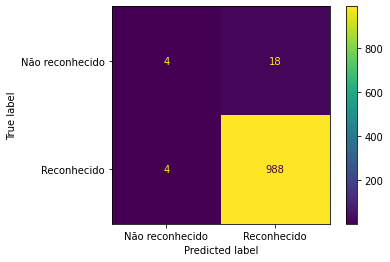

In [19]:
# y_pred = pipe.predict(X_test)
plot_confusion_matrix(pipe,X_test,y_true, values_format='d')